# Modelos de Machine Learning - Sua Relação com Ciência de Dados

Todo modelo de Machine Learning precisa de DADOS, eles são a base para que as predições ou classificações sejam possíveis. Nesse notebook, iremos explorar o laso teórico de 4 processos:

- Testes com Hipótese Nula.
- Trabalhar com dados categóricos.
- Criação de Modelo de Classificação Linear.
- Criação de Modelo de Árvore de Decisão.

## 1 - Hipótese Nula

A hipótese nula é a acurácia de um modelo que sempre categoriza algo como o resultado mais frequente. Nesse caso, temo a quantidade de vezes que o resultado mais frequente ocorreu ($r$) dividida pelo número total de resultados ($N$).

$$
H_{0} = \frac{r}{N}
$$

É important que seu modelo seja funcional e não apenas parecido com a hipótese nula. Um exemplo que ilustra essa necessidade é um que temos 70% dos casos da classe A e 30% de outras classes. Se nosso modelo sempre chutar que um elemento é da classe A ele terá 70% de acurácia, mas isso não significa que ele está correto.

Outro exemplo (mais próximo da realidade) é um classificador de números. Nesse problema, queremos criar um classificador que recebe como entrada uma imagem de um dígito  desenhado a mão e retorna se o número desenhado é $5$ ou não. Isso é um classificador binário, nos diz apenas se algo é ou não é a classe que queremos. Vamos dizer que todos os dígitos tem proporção igual, ou seja, 10% para cada um. Nossa hipótese nula nos dá 90% de acurácia, basta o modelo sempre chutar que algo não é 5.

Por esses, e muitos outros exemplos, é importante analisar sua acurácia com base na hipótese nula do seu dataset.

## 2 - Variáveis Categóricas

Uma variável categórica contêm um número finito de categorias ou grupos distintos, geralmente um nome de uma das classes daquela coluna (mas ela também pode ser um número). No exemplo abaixo, estamos lendo um DataFrame que possui várias variaveis categóricas.

In [1]:
import pandas as pd
import numpy as np

# lendo o CSV
df_og = pd.read_csv("data/AVC/avc-data.csv")

df_og

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


As colunas `gender`,`	ever_married`,` work_type`,` Residence_type` e ` smoking_status` possuem variáveis categóricas. Geralmente, esses datasets que tem esses valores são o resultado de algum tipo de formulário ou censo. 

Mas, como transformar isso em dados numéricos booleanos? Pelo OneHotEncoding. Nós separamos uma coluna para cada possibilidade de escolha. Vamos utilizar como exemplo a coluna `ever_married`.

Nela, há duas possibilidades: *Yes* e *No*. Portanto, é necessário criarmos uma coluna `ever_married_Yes` e outra `ever_married_No`, o valor dentro delas será $1$ se aquela opção foi selecionada ou $0$ se a opção não foi selecionada. Dessa maneira, se uma linha tem $1$ em uma das colunas, ela automaticamente tem $0$ na outra.

Abaixo temos esse processo em código. Ele realiza o OneHotEncoding para todas as colunas ao mesmo tempo.

In [2]:
import pandas as pd
import numpy as np

# lendo o CSV
df_og = pd.read_csv("data/AVC/avc-data.csv")

# One Hot Encoding dos dados (tranformando variáveis em booleanos); Dummyficando o DataFrame
df_og = pd.get_dummies(df_og)

df_og

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,51676,61.0,0,0,202.21,NaN,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,True,False,False,...,False,True,False,False,False,True,False,False,True,False
5106,44873,81.0,0,0,125.20,40.0,0,True,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,19723,35.0,0,0,82.99,30.6,0,True,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.6,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False


# Resumo de Técnicas

In [3]:
# Declaração da função de accuracy
def accuracy(y_test, y_est):
    return np.mean(np.sign(y_test)==np.sign(y_est))

## Classificação Linear

O processo de aproximação linear é uma maneira de criar um modelo que consegue prever próximos resultados a partir de informações atuais.

A operação é, como o nome já da a entender, uma maneira de tentar criar uma linha que contemple os pontos do DataFrame ou matriz original. 

Para isso, realizamos um processo de "aprendizado", onde, ao longo de um número de épocas (escolhido pelo usuário), vamos corrigindo a matriz de pesos ($W^T$) e o bias ($b$) que modificam a matriz de features ($X$) e nos dão a matriz de estimativa de valores ($Y^{est}$).

Inicialmente, criamos a matriz de pesos $W^T$ e o bias $b$ com valores que não são importantes, ou seja, podem ser aleatórios ou 1, já que eles serão corrigidos ao longo do processo. 

Depois, separamos nossas matrizes originais (matriz $X$ de features e $Y$ de resultados) em $X_{test}$, $Y_{test}$, $X_{train}$ e $Y_{train}$. Treinamos nosso modelo com as matrizes $train$ e testamos a sua efetividade com as matrizes $test$.

O próximo passo é criar nossa função de erro. Nela, tentamos estimar uma matriz $Y$, chegando em $Y^{est}$. Retornamos a média da diferença quadrada entre as duas matrizes (erro). Assim, ficamos com a seguinte conta. 

$$

Y^{est} = W^TX + b

$$

$$
Erro = Média((Y-Y^{est})^2)
$$

Essa função é passada para o gradiente (função grad) da biblioteca do autograd. Ela consegue nos retornar automaticamente o vetor gradiente da função erro, vetor esse com a derivada do erro em relação a cada parâmetro da função. O seu retorno é uma tupla, com novos valores de $W_{err}^T$ e $b_{err}$.

Ao longo das épocas, multiplicamos $W_{err}^T$ e $b_{err}$ por $\alpha$, nosso learning rate. Pegamos esse número (erro da função gradiente) e subtraímos dos valores originais de $W^T$ e $b$, os deixando cada vez mais próximos dos números ideais para a função de reta. Temos: 

$$
W^T = W^T - \alpha W_{err}^T
$$

$$
b = b - \alpha b_{err}
$$

No final, temos um $W_{err}^T$ e um $b_{err}$ que se assemelham a equação mais próxima da reta dos pontos originais, criando nosso modelo preditivo.

Checamos a efetividade do modelo por meio de uma comparação. Primeiro, calculamos um $Y^{est}$ para $X^{test}$. Agora, utilizando a função accuracy que nos foi dada pelo professor Tiago Tavares, calculamos a acurácia do modelo. 

O processo ainda não terminou, pois precisamos verificar o modelo comparado a hipótese nula.

In [4]:
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# lendo o CSV
df_og = pd.read_csv("data/AVC/avc-data.csv")

# One Hot Encoding dos dados (tranformando variáveis em booleanos); Dummyficando o DataFrame
df_og = pd.get_dummies(df_og)

df_og = df_og.astype(float)

# retirada de variáveis não booleanas do DataFrame (variáveis que não possíveis de serem representadas no OneHot Encoding)
df = df_og.drop(columns=['id','age','bmi','avg_glucose_level'])
df = df.dropna()

# Criação da Matriz de Features - Todos as Variáveis, menos o resultado de se a pessoa teve um AVC ou não
# importante ressaltar que as colunas ditas na linha abaixo são as ignoradas
df_values = df.drop(columns=['stroke'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# W - Matriz de Pesos
w = np.random.randn(x.shape[1],1)

# Viés (Bias) da equação
b = 0.1

# Matriz de Features (valores medidos)
X = X_train.T*1.0

# Matriz de Resultados Medidos
Y = Y_train.T*1.0

# Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
def erro(param):
    w,b,x,y= param
    y_ = w.T@x + b
    return np_.mean((y_-y)**2)

# processo de realização da função de gradiente
g = grad(erro)

# "Learning Rate" do nosso modelo
alpha = 0.01

# Épocas - Iterações do Código
epocas = 10000

# Iteração de for para o aprendizado do modelo
for _ in range(epocas):
    g_= g((w,b,X,Y))
    w -= alpha*g_[0]
    b -= alpha*g_[1]

# Estimativa de Y (resultado da aproximação linear)
y_est =  w.T@X_test.T + b

# checando a acurácia do modelo
acc = accuracy(y_est,Y_test.T)

print(f'Accuracy : {acc*100:.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Accuracy : 95.38%
Hipótese Nula : 95.13%


No final do processo, 95% de acurácia parece ser muito, mas isso não significa nada já que a hipótese nula (chutas que ninguém tem AVC) é superior.

É importante minimizar o efeito da hipótese nula. Geralmente, uma boa hipótese nula é em torno de 50%, para que a acurácia do seu modelo possa ser medida de maneira mais justa.

Abaixo está um exemplo em código de como fazer.

In [5]:
import numpy as np
import autograd.numpy as np_
from autograd import grad
from sklearn.model_selection import train_test_split


# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]
df_h0_stroke = df_h0_stroke.dropna()

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]
df_no_stroke = df_no_stroke.dropna()

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:df_h0_stroke.shape[0]]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

# ignorando as colunas que não são possíveis de serem transformadas em variáveis booleanas
df = df_h0.drop(columns=['id','avg_glucose_level','bmi','age'])
df = df.dropna()

# Criação da Matriz de Features - Variáveis relacionadas a saúde, biologia e gênero da pessoa e não a condição de vida do indivíduo
df_values = df.drop(columns=['stroke'])
x = df_values.to_numpy()
x

# Criação da Matriz de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_stroke = df_stroke.replace(0,-1)
y = df_stroke.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# lista que armazena os valores da acurácia de cada iteração do modelo
acuracia = []

# Realizar o processo de aproximação 100 vezes, para termos uma ideia melhor do desempenho do modelo
for _ in range(100):
    # W - Matriz de Pesos
    w = np.random.randn(x.shape[1],1)

    # Viés (Bias) da equação
    b = 0.1

    # Matriz de Features (valores medidos)
    X = X_train.T*1.0

    # Matriz de Resultados Medidos
    Y = Y_train.T*1.0

    # Cálculo do Erro - Uma equação de Reta (ax + b = y), mas com matrizes que possuem mais do que dois valores cardeais
    def erro(param):
        w,b,x,y= param
        y_ = w.T@x + b
        return np_.mean((y_-y)**2)

    # processo de realização da função de gradiente
    g = grad(erro)

    # "Learning Rate" do nosso modelo
    alpha = 0.01

    # Épocas - Iterações do Código
    epocas = 10000

    # Iteração de for para o aprendizado do modelo
    for _ in range(epocas):
        g_= g((w,b,X,Y))
        w -= alpha*g_[0]
        b -= alpha*g_[1]

    # Estimativa de Y (resultado da aproximação linear)
    y_est =  w.T@X_test.T + b

    # checando a acurácia do modelo
    acc = accuracy(y_est,Y_test.T)
    acuracia.append(acc)

# gravando os resultados em CSV
df_acc = pd.DataFrame({'Accuracy':acuracia})
df_acc['Accuracy'] *= 100
df_acc.to_csv('data/AVC/class-linear/teste1.csv')

In [7]:
acuracia = pd.read_csv('data/AVC/class-linear/teste1.csv')['Accuracy'].mean()
print(f'Acurácia Média : {np.mean(acuracia):.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Acurácia Média : 58.54%
Hipótese Nula : 50.00%


## Árvore de Decisões

Uma possível maneira de definir o "poder de decisão" de uma pergunta é usar a Entropia de Shannnon. A entropia é um conceito ligado à quantidade de informação de uma decisão ou de uma resposta, e foi refinada por [Shannon (1948)](https://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf).

A Entropia de Shannon é um valor $H(X)$ ligado a uma variável aleatória $X$. No caso discreto (que é o que nos interessa), a entropia é a soma de $- P(X=x_i) \log_2(P(X=x_i))$ para cada observação possível $x_i$, ou:

$$
H(X) = -\sum_i P(X=x_i) \log _2(P(X=x_i)).
$$

Quanto maior for o valor da entropia, mais informações a pergunta nos dá.

Relacionado ao classficador, é extremamente útil saber quais "perguntas" deverão ser feitas, ou seja, quais informações do nosso DataFrame deverão ser analisadas com maior pudor (e como). Portanto, a entropia nos leva a decidir como deverá ser liderada a nossa análise, quais colunas a serem analisadas primeiro, qual é a comparação que gostaríamos de fazer, etc. 

A "árvore" da "árvore de decisão" vem quando realizamos questionamentos em série, podendo separar nossa classificação em ramos que representam se algo é ou não verdadeiro (com os nódulos da árvore sendo as "perguntas" realizadas).

No código, utilizamos a biblioteca do `sklearn.tree`, que já possui uma classe `DecisionTreeClassifier` que recebe o parâmetro `criterion = "entropy"` como critério de classificação, nos dando uma árvore de decisão por entropia.

O teste abaixo já foi feito com a hipótese nula em consideração.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

# df de quem teve AVC
df_h0_stroke= df_og[df_og['stroke']==1]
df_h0_stroke = df_h0_stroke.dropna()

# df de quem não teve AVC
df_no_stroke = df_og[df_og['stroke']==0]
df_no_stroke = df_no_stroke.dropna()

# selecionando mesma quantidade de pessoas que tiveram um AVC
df_h0_no_stroke = df_no_stroke.iloc[0:df_h0_stroke.shape[0]]

# df com mesma proporção de quem teve e quem não teve AVC, para minimizar a hipótese nula
df_h0 = pd.concat([df_h0_stroke,df_h0_no_stroke])

df = df_h0.drop(columns=['id'])
df = df.dropna()

# Criação do DataFrame de Features
df_features = df.drop(columns=['stroke','ever_married_No','ever_married_Yes','Residence_type_Rural','Residence_type_Urban'])
x = df_features.to_numpy()
x

# Criação do DataFrame de Resultados Medidos - Apenas as informações de se a pessoa teve um AVC ou não
df_stroke = df['stroke']
df_rotulo = df_stroke.replace(0,-1)
y = df_rotulo.to_numpy()
y

# Criação de Matrizes de Treinamento e de Teste, para podermos conferir a acurácia do processo de predição
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

# lista que armazena os valores da acurácia de cada iteração do modelo
acuracia = []

# Realizar o processo de criação de árvore 1000 vezes, para termos uma ideia melhor do desempenho do modelo
for _ in range(1000):

    # criação da árvore de decisão
    tree = DecisionTreeClassifier(criterion='entropy')

    # Agora, vamos usar o método .fit() para ajustar os parâmetros da árvore:
    tree.fit(X_train, Y_train)

    # Tentando prever os AVCs
    y_pred = tree.predict(X_test)

    # Calculando Acurácia
    acc = accuracy_score(y_pred,Y_test)
    acuracia.append(acc)

# gravando os resultados em CSV
df_acc = pd.DataFrame({'Accuracy':acuracia})
df_acc['Accuracy'] *= 100
df_acc.to_csv('data/AVC/tree/teste4.csv')

In [ ]:
acuracia = pd.read_csv('data/AVC/tree/teste4.csv')['Accuracy'].mean()
print(f'Acurácia Média : {np.mean(acuracia):.2f}%')
print(f'Hipótese Nula : {(df_stroke.value_counts().sort_values().max()/df_stroke.shape[0])*100:.2f}%')

Acurácia Média : 71.14%
Hipótese Nula : 50.00%


É possível, também, visualizar a árvore, como na célula abaixo.

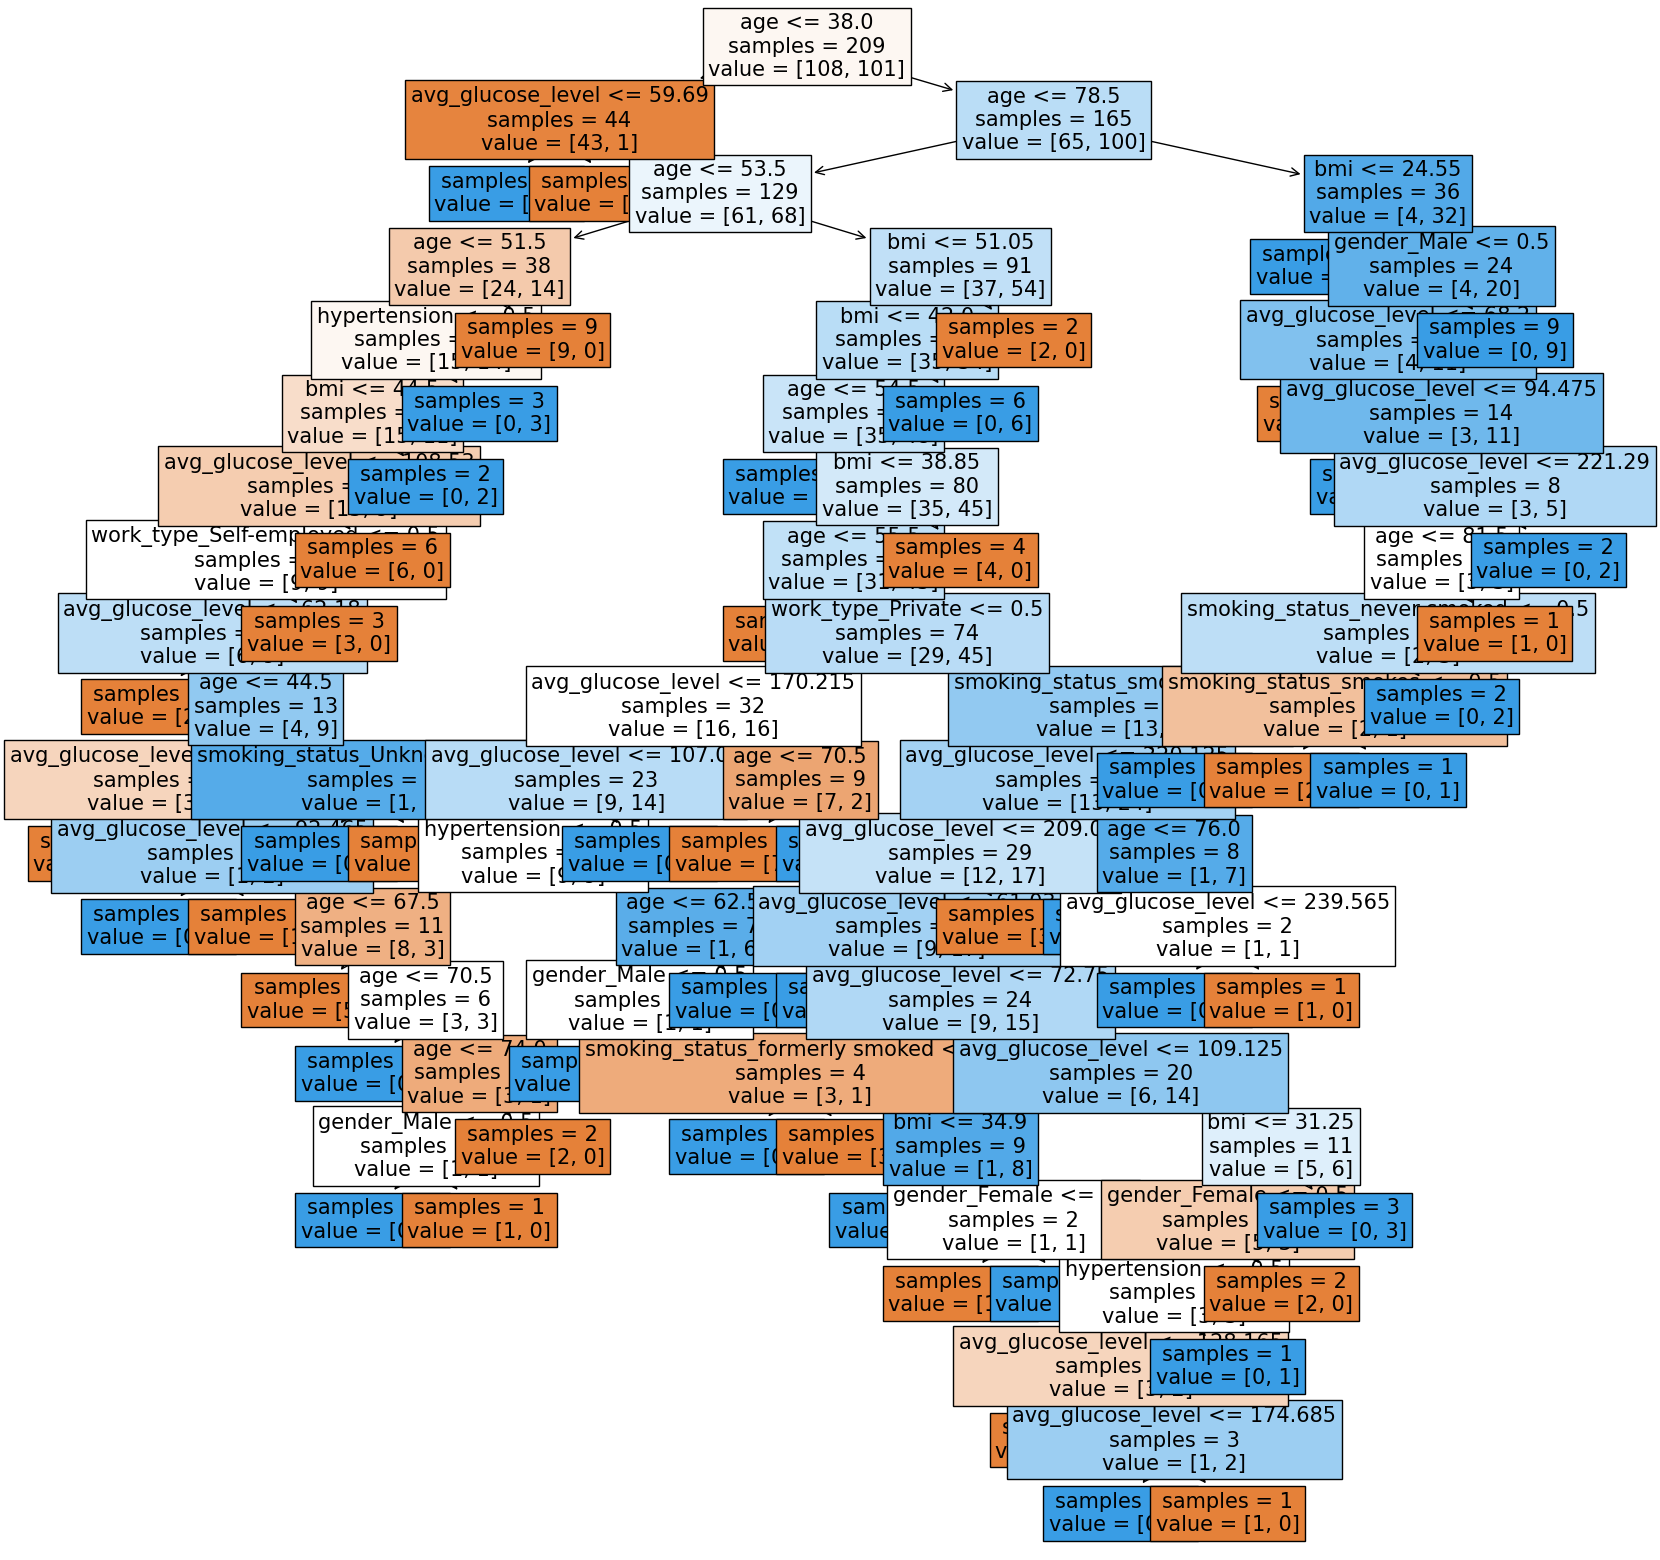

In [ ]:
# Visualização da Árvore de Decisão que foi gerada
plt.figure( figsize=(20,20) )
a = plot_tree(tree, feature_names=list(df_features.columns), fontsize=15, 
              node_ids=False, impurity=False, filled=True)

Repository under MIT License. Copyright &copy; 2023 João Alfredo Cardoso Lamy